## Problem Statement
Rainfall is one of the most significant meteorological factors that affect many aspects of our everyday lives. The socio-economic repercussions of rainfall are remarkable, with consequences ranging from disruptions in the transportation network to damage to infrastructure, especially in the event of flood. Flood and other extreme occurrences resulting from climate change are anticipated to happen more frequently and will have disastrous repercussions in the years to come. Rainfall is, without a doubt, a crucial climatic component in agricultural productivity, as it has a considerable economic impact on any country. It is well known that a negligible water supply is one of the two main factors that limit agricultural productivity. As the world continues to experience constantly changing climatic circumstances, rainfall forecasting has become a difficult and demanding task. The country’s sustainable agriculture and resource management will greatly benefit from the forecasting of seasonal rainfall systems. In addition to the farmers who will receive enormous help from it, flood warning systems can also be implemented using rainfall predictions to create warnings so that corrective or preventive measures can be applied.  
Therefore, this project attempts to forecast the potential rainfall by forecasting the amount of precitable water available for precipitation throughout a given duration into the future (say 1 or 2 years).

### About the Dataset
#### Data Source: https://www.kaggle.com/datasets/shiratorizawa/ncarcsv2

The datset contains atmospheric variables over different latitude and longitude starting from year 1948 to 2018. There are 21 features.  
- lat : Latitude
- lon : Longitude
- time : Dates
- slp : Mean sea level pressure
- uwnd-x, uwnd-y and uwnd : U-wind
- vwnd-x, vwnd-y and vwnd : V-wind
- tmp-x, tmp-y and tmp : Temperature
- omega-x, omega-y and omega : Vertical Wind velocity
- rhum-x, rhum-y and rhum : relative humidity
- pr-wtr : Precipitable water
- rain : Rainfall

In [49]:
from prophet import Prophet
from neuralprophet import NeuralProphet

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

### Load data

In [2]:
df = pd.read_csv(r'.\data\finalDatasetWithRain.csv')

In [3]:
df.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,101910.0,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990,-9999.0
1,30.0,70.0,1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,102190.0,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995,-9999.0
2,30.0,70.0,1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,102222.0,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994,-9999.0
3,30.0,70.0,1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,102042.0,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995,-9999.0
4,30.0,70.0,1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,102215.0,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994,-9999.0


#### Filtering the data for one location (lat: 30, lon: 70)

In [33]:
df_30_70 = df.query('lat==30.0 and lon==70.0')

In [5]:
df_30_70.dtypes

lat        float64
lon        float64
time        object
omega_x    float64
omega_y    float64
omega      float64
pr_wtr     float64
rhum_x     float64
rhum_y     float64
rhum       float64
slp        float64
tmp_x      float64
tmp_y      float64
tmp        float64
uwnd_x     float64
uwnd_y     float64
uwnd       float64
vwnd_x     float64
vwnd_y     float64
vwnd       float64
rain       float64
dtype: object

In [6]:
# checking for Missing Values
(df_30_70.isnull().sum()/len(df_30_70))*100

lat        0.000000
lon        0.000000
time       0.000000
omega_x    0.115683
omega_y    0.115683
omega      0.115683
pr_wtr     0.000000
rhum_x     0.000000
rhum_y     0.000000
rhum       0.000000
slp        0.000000
tmp_x      0.000000
tmp_y      0.000000
tmp        0.000000
uwnd_x     0.000000
uwnd_y     0.000000
uwnd       0.000000
vwnd_x     0.000000
vwnd_y     0.000000
vwnd       0.000000
rain       0.000000
dtype: float64

### Observations
1. The data type of the time feature is string (object) - it has to be handled.
2. Three features, `omega_x, omega_y, and omega` all have 0.116% missing values each.

### Inputing missing values

In [34]:
# Imputing with linear interpolation
df_30_70.interpolate(method='linear', inplace=True)

### Converting the "time" feature from "object" to "datetime", and setting it as index.

In [35]:
# Making the time colume to datetime and setting it to index
df_30_70['time'] = pd.to_datetime(df_30_70['time'])
df_30_70.set_index('time', inplace=True)

In [9]:
df_30_70.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
time,,,,,,,,,,,,,,,,,,,,
1948-01-01,30.0,70.0,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,101910.0,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990,-9999.0
1948-01-02,30.0,70.0,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,102190.0,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995,-9999.0
1948-01-03,30.0,70.0,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,102222.0,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994,-9999.0
1948-01-04,30.0,70.0,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,102042.0,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995,-9999.0
1948-01-05,30.0,70.0,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,102215.0,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994,-9999.0


### Visualizing the data

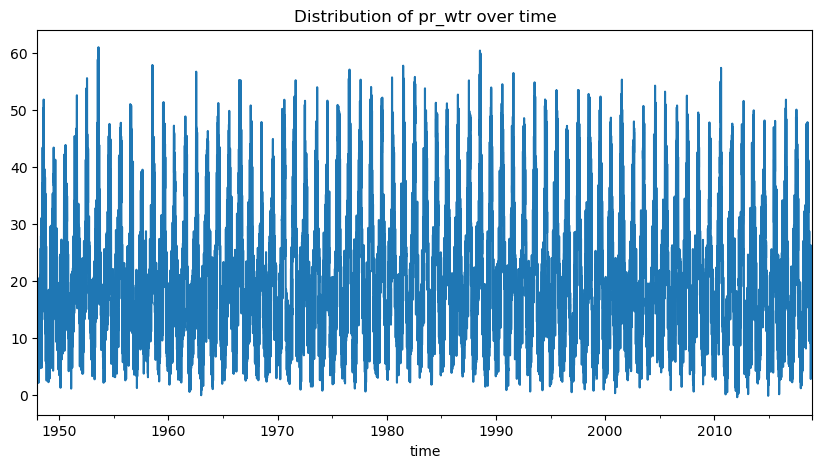

In [10]:
plt.figure(figsize=(10,5))
df_30_70['pr_wtr'].plot()
plt.title('Distribution of pr_wtr over time')
plt.show()

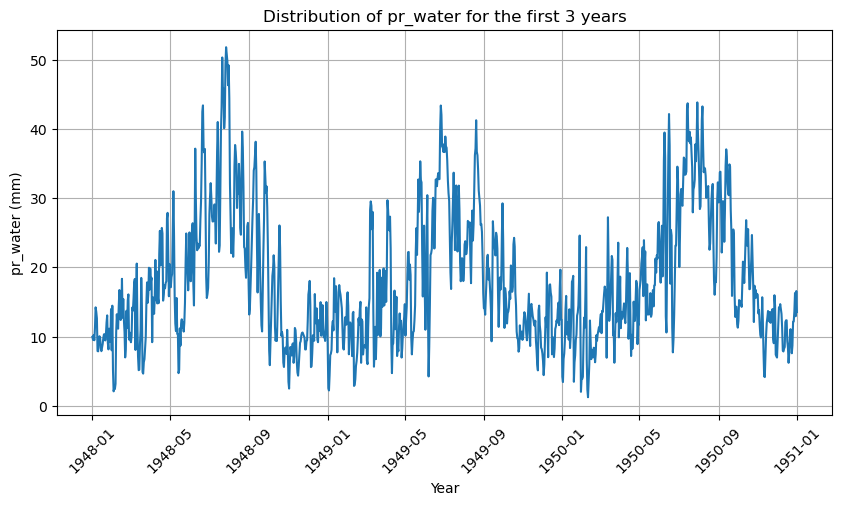

In [11]:
first_3_year = df_30_70.pr_wtr.loc[df_30_70.pr_wtr.index<='1951-01-01']
plt.figure(figsize=(10,5))
plt.plot(first_3_year)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('pr_water (mm)')
plt.title('Distribution of pr_water for the first 3 years')
plt.grid()
plt.show()

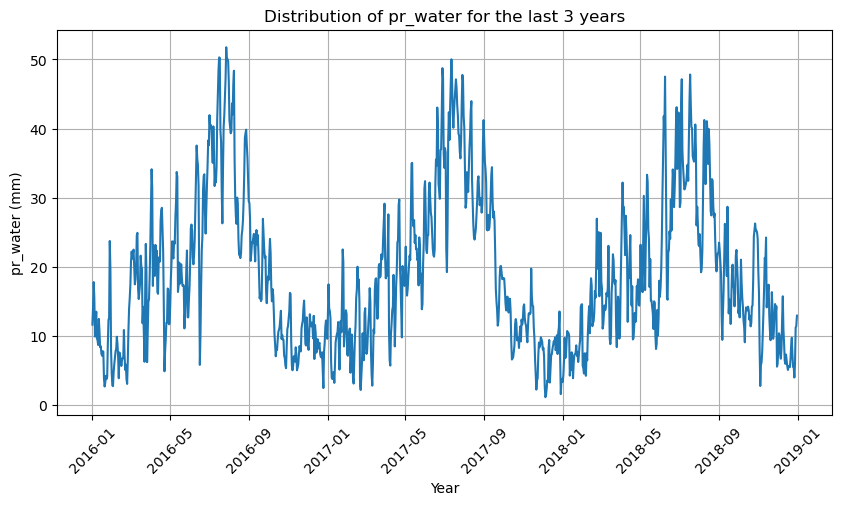

In [12]:
last_3_year = df_30_70.pr_wtr.loc[df_30_70.pr_wtr.index>='2016-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_3_year)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('pr_water (mm)')
plt.title('Distribution of pr_water for the last 3 years')
plt.grid()
plt.show()

### Observation
From the plots above, there is a yearly seasonality observed for pr_water over the years

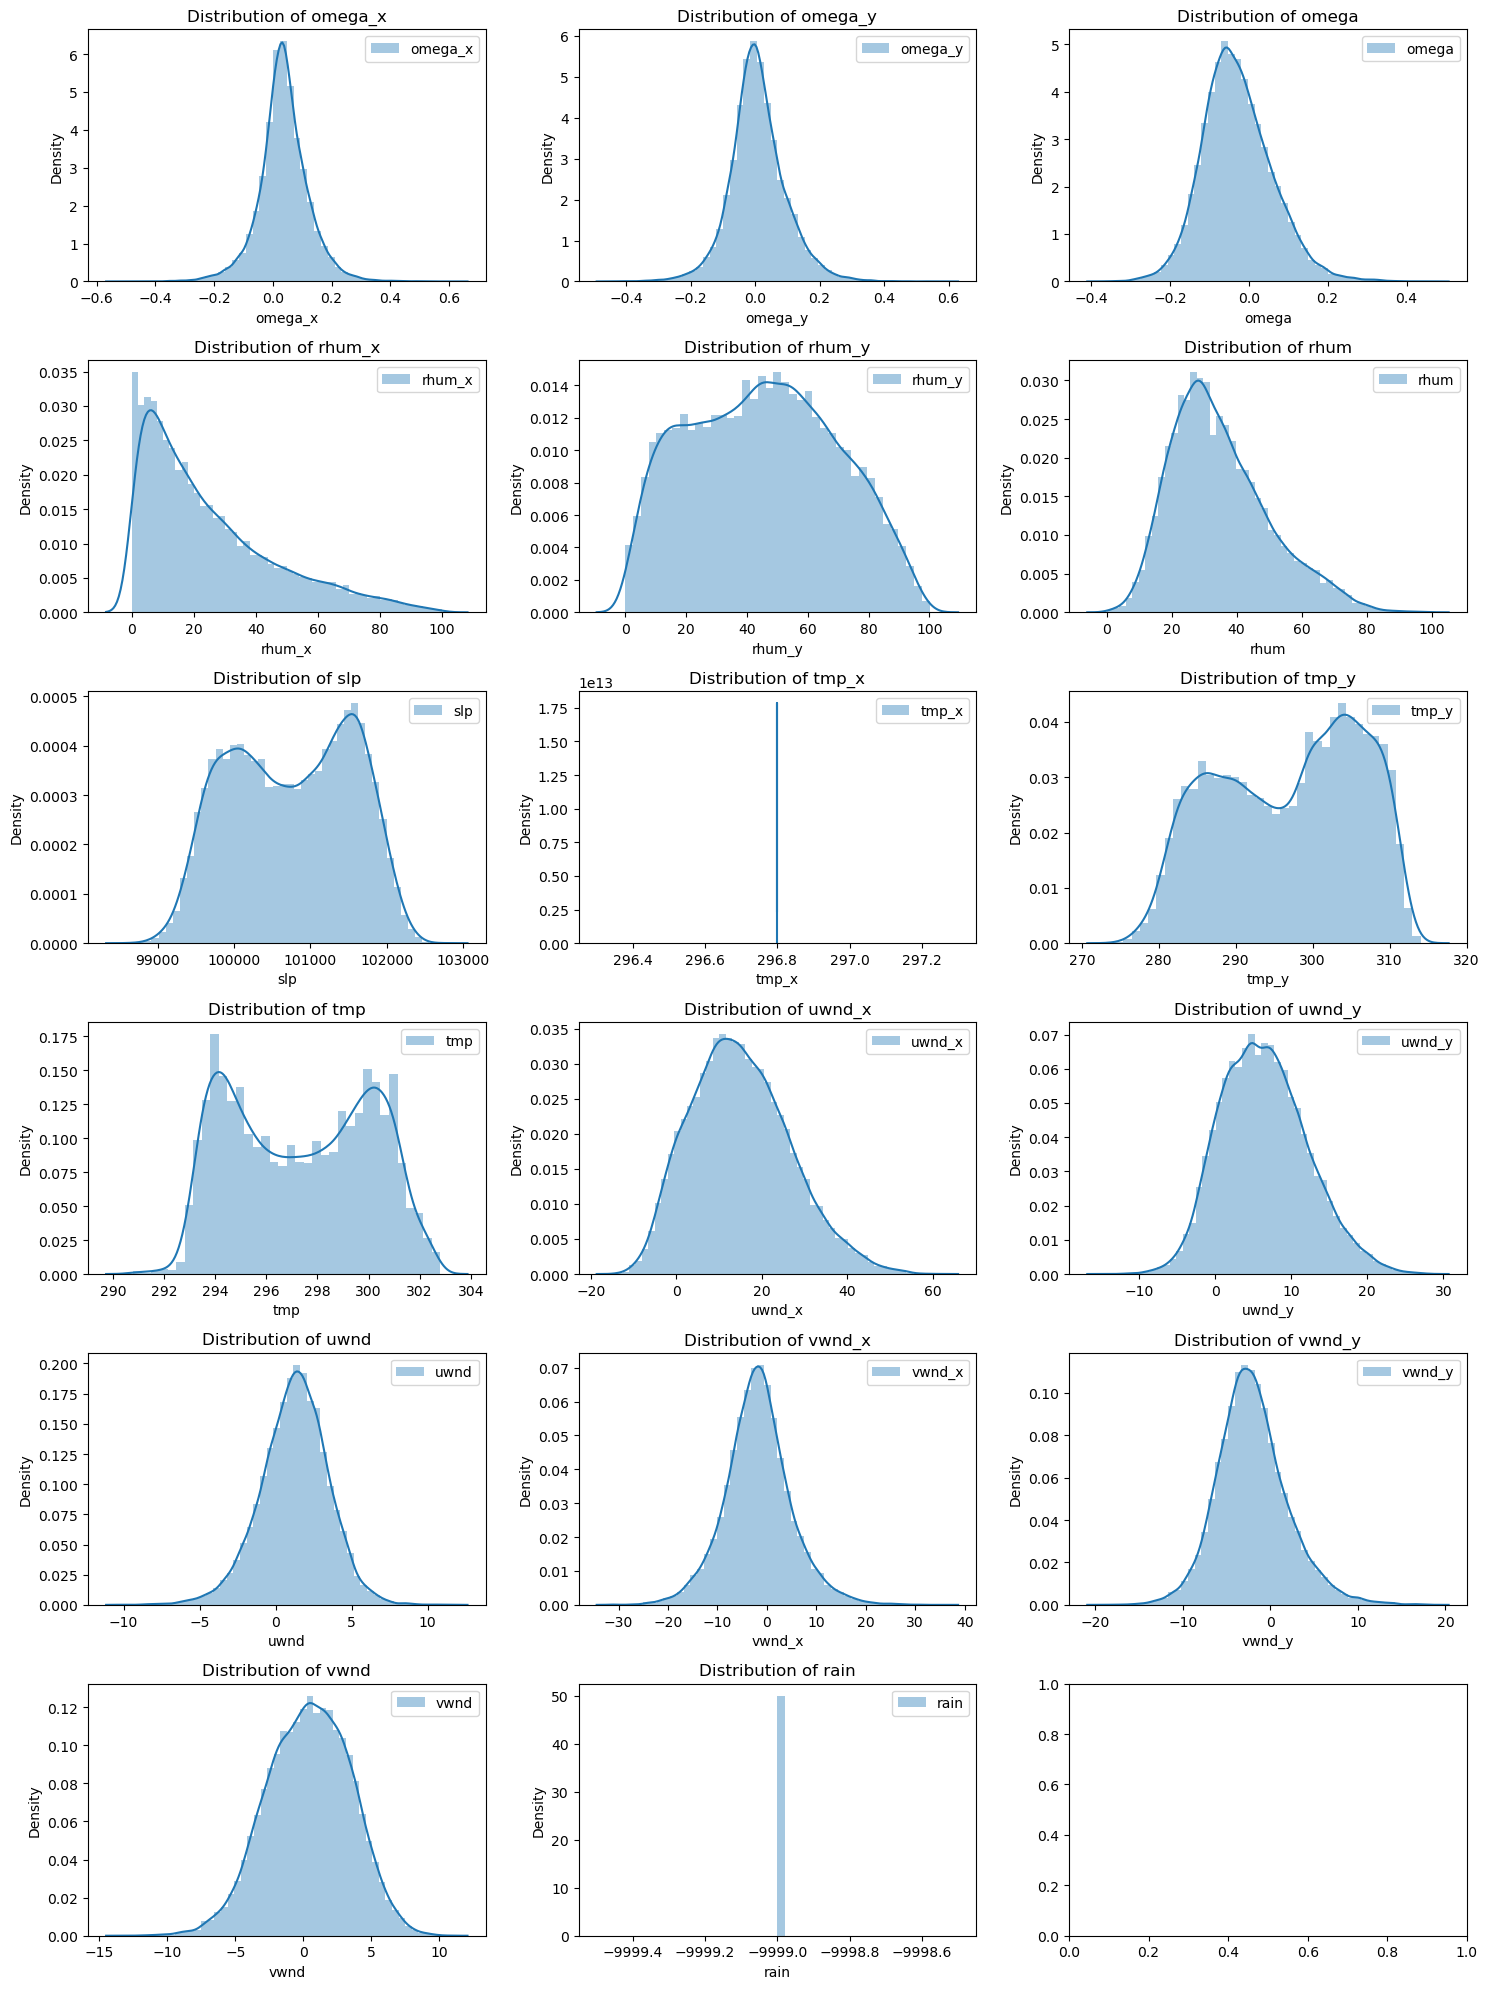

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,20))
for idx, feature in enumerate(df_30_70.drop('pr_wtr', axis=1).columns[2:]):
    ax = sns.distplot(a=df_30_70[feature], ax=axes[idx//3, idx%3], label=feature)
    ax.set_title(f"Distribution of {feature}")
    ax.legend()
plt.tight_layout()

### Observations:
1. `temp_x` and `rain` have constant values of **296.8** and **-9999.0** respectively throughout the dataset.
2. Every other feature is normally or almost normally distributed except for `rhum_x`, `rhum_y`, `slp, temp_y`, and `tmp`.

### Verify the values in temp_x and rain features as observed above

In [14]:
print("Total unique values in tmp_x:", df_30_70['tmp_x'].nunique())
print("Total unique values in rain:", df_30_70['rain'].nunique())
#df_30_70.tmp_x.min()

Total unique values in tmp_x: 1
Total unique values in rain: 1


### The features are meaningless, hence we drop them
we'll also drop the "lat" and "lon" columns because they are not needed any more

In [36]:
df_30_70.drop(['lat', 'lon','tmp_x', 'rain'] , axis=1, inplace=True)

In [37]:
df_30_70.to_csv('data/cleaned_rainfall_data.csv')

In [38]:
cleaned_df = pd.read_csv('data/cleaned_rainfall_data.csv')

### Boxplot
Lets check for the presence of extreme values using boxplot

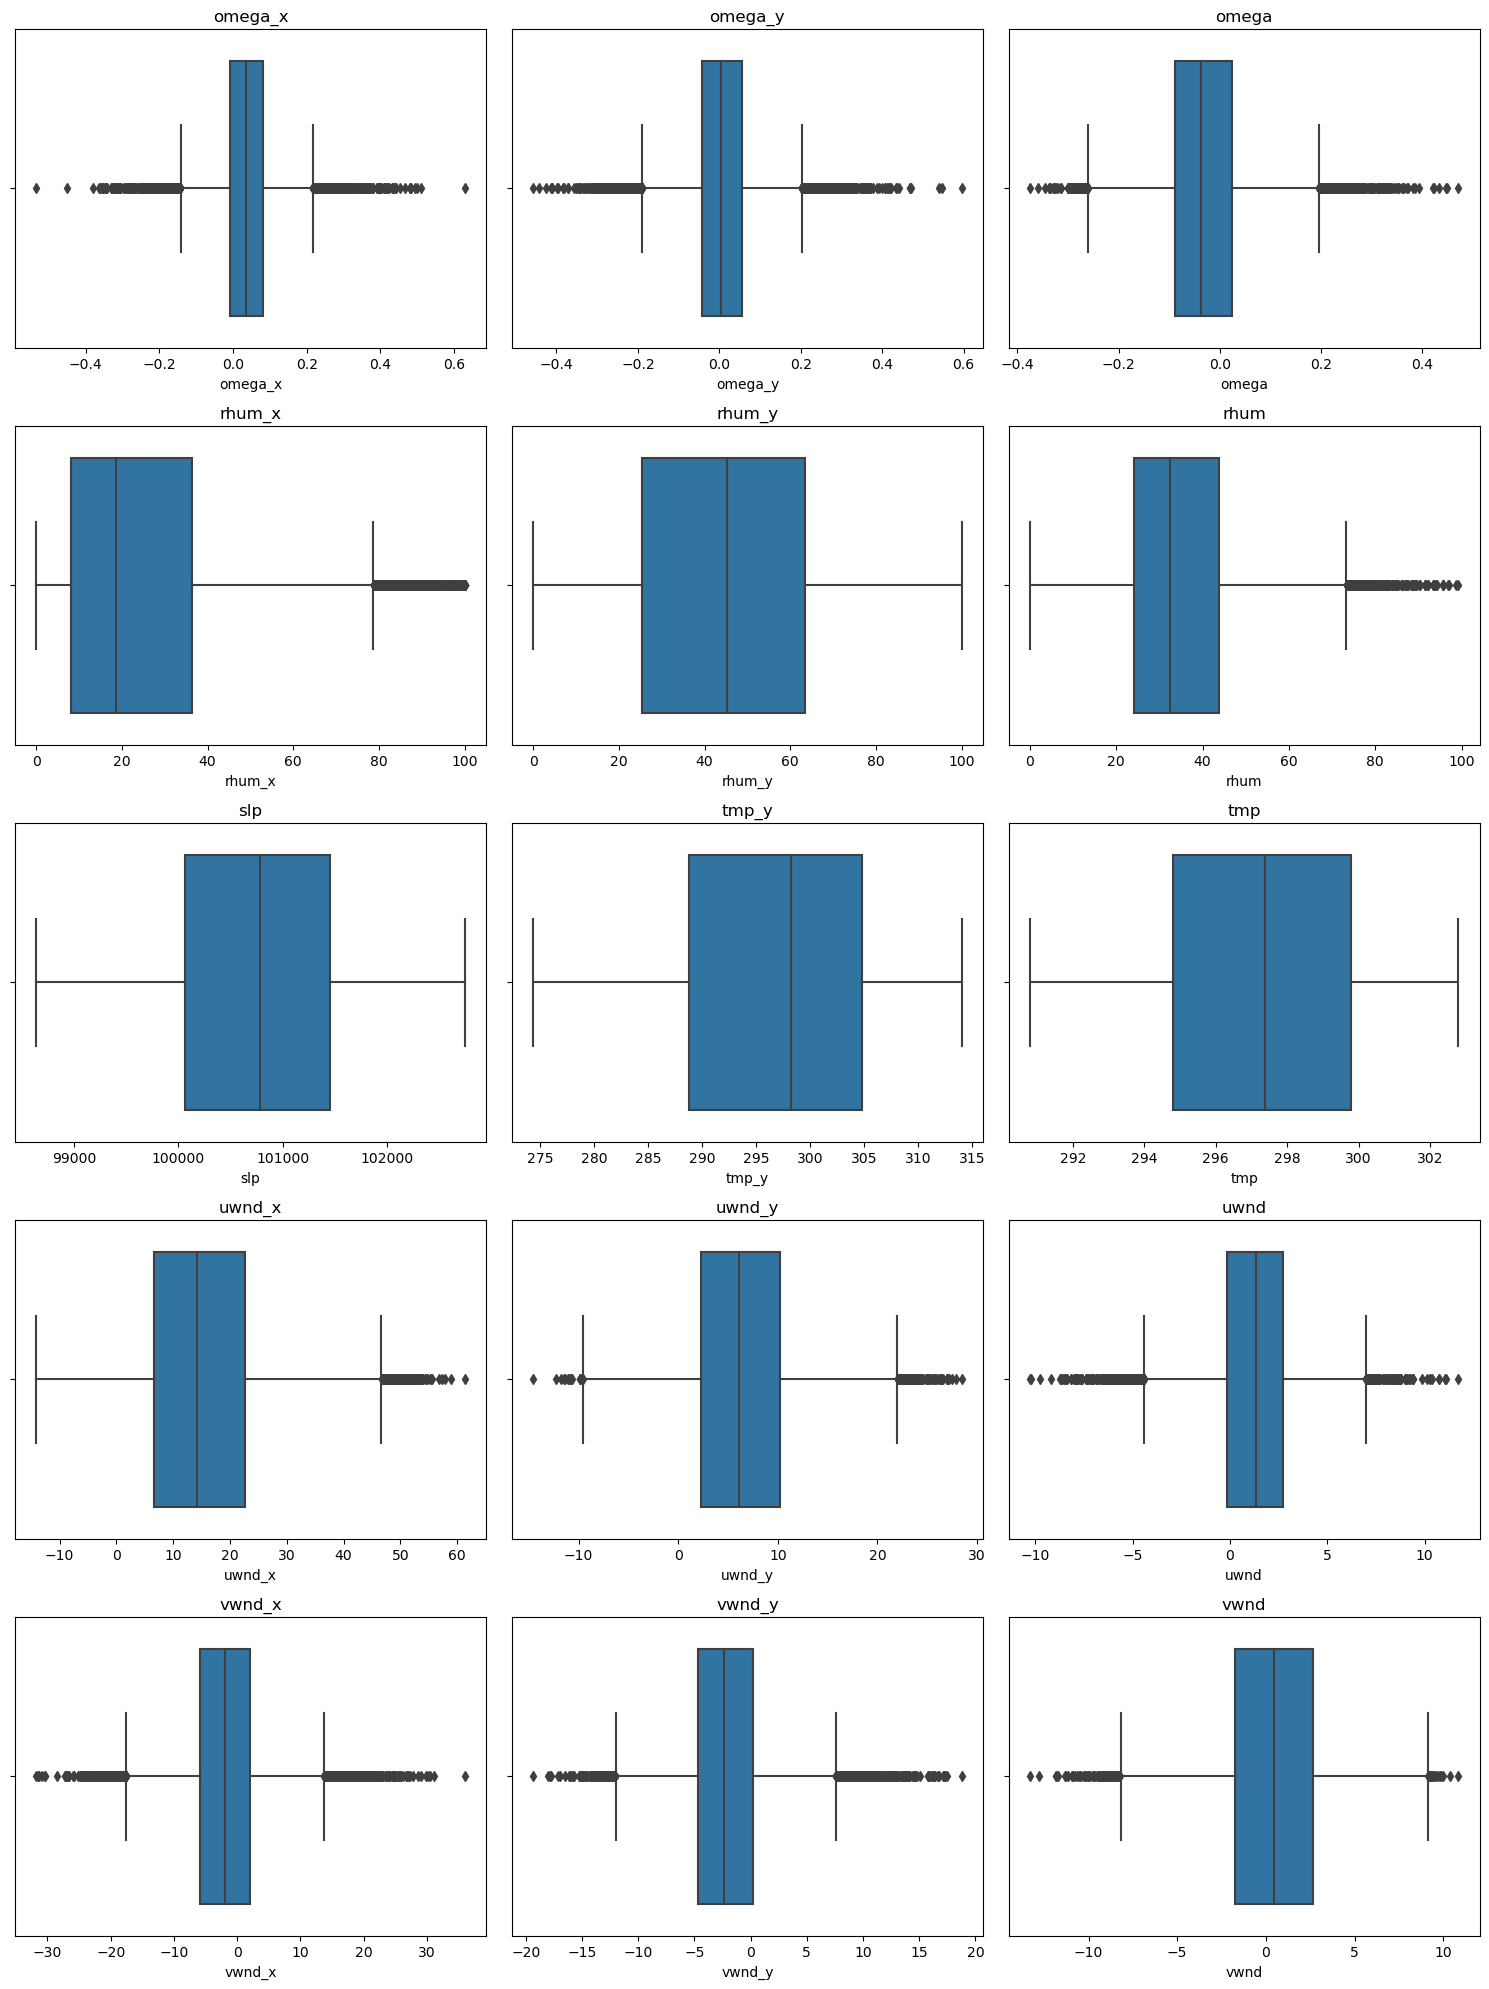

In [41]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
for idx, feature in enumerate(cleaned_df.drop('pr_wtr', axis=1).columns[1:]):
    ax = sns.boxplot(cleaned_df[feature], ax=axes[idx//3, idx%3])
    ax.set_title(feature)
plt.tight_layout()

### Observations:
There are extreme values present in all the features except `rhum_y`, `slp`, `tmp_y`, and `tmp`.  
Of course this may correspond to days that recorded heavy rainfall. (We'll have this values in mind as we proceed with the model)

### Investigate the correlation of other features to the target variable (pr_wtr).

In [42]:
# Check the correlation between other features and the target variable.
corr_data = cleaned_df.corr()
corr_data.abs()['pr_wtr'].sort_values(ascending=False)

pr_wtr     1.000000
tmp_y      0.723513
slp        0.715450
uwnd_x     0.676430
rhum_y     0.661081
uwnd_y     0.606514
vwnd       0.598701
rhum       0.540226
omega      0.522588
tmp        0.447026
omega_y    0.418694
omega_x    0.276757
uwnd       0.203505
rhum_x     0.067540
vwnd_y     0.061336
vwnd_x     0.028259
Name: pr_wtr, dtype: float64

### Visualizing the correlation

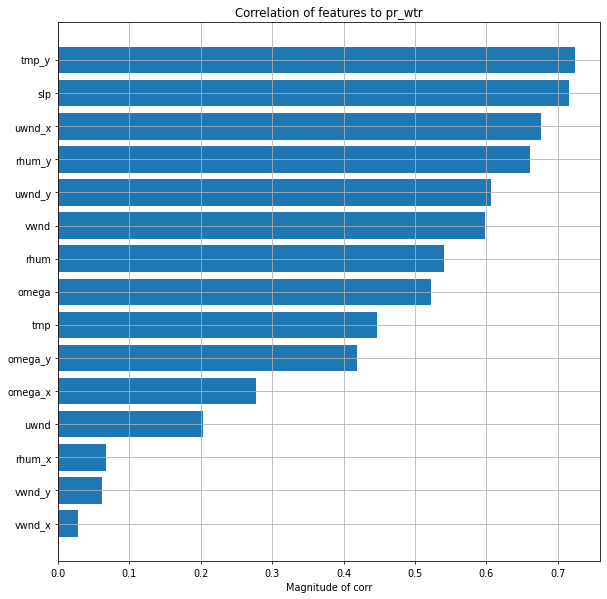

In [48]:
def plot_corr_scores(corr_data, target):
    """
    Displays the horizontal bar plot showing how features are correlated with the target variable
    corr_data: The DataFrame containing the correlation scores between all the features
    target: The dependent variable whoes value you aim to predict
    """
    scores = corr_data.abs()[target].drop(target)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(f"Correlation of features to {target}")
    plt.xlabel('Magnitude of corr')
    plt.grid()
    
plt.figure(dpi=70, figsize=(10,10))
plot_corr_scores(corr_data, 'pr_wtr')

### Observation
We can clearly see the degree of correlation of the features with the target variable `pr_wtr`, the feature `tmp_y` has the highest correlation value, followed by `slp`.

## Modeling

### Preparing the data in a way that prophet expects

    When training prophet, it requires that the "date" and "target" features be named "ds" and "y" respectively

In [50]:
new_df = df_30_70.reset_index()[['time', 'pr_wtr']].rename(columns={'time': 'ds', 'pr_wtr': 'y'})
new_df.head()

,ds,y
0,1948-01-01,9.959991
1,1948-01-02,9.519989
2,1948-01-03,10.220001
3,1948-01-04,9.470001
4,1948-01-05,11.269989


### Splitting the data into train and test set
    We have 71 years of data in total (1948 - 2018) containing 25933 data points, we'll train the model on the first 80% of
    data and test on the last 20%

In [51]:
TRAIN_SIZE = int(len(new_df)*0.8)
TEST_SIZE = int(np.ceil(len(new_df)*0.2))
train_df = new_df.iloc[:TRAIN_SIZE]

In [ ]:
train_df.tail()

In [52]:
model = Prophet()
model.fit(train_df)

23:59:26 - cmdstanpy - INFO - Chain [1] start processing
23:59:36 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
#predict
future = model.make_future_dataframe(periods= TEST_SIZE , freq= 'D' )

forecast = model.predict(future)
#forecast.head()

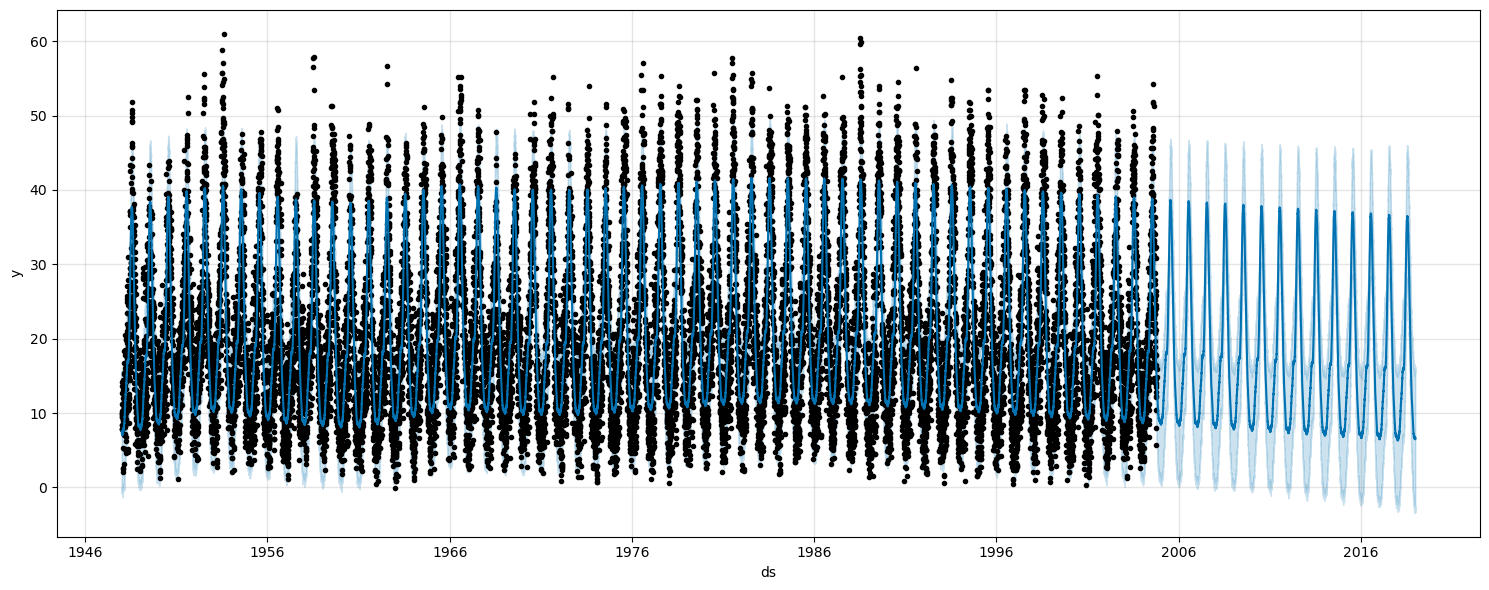

In [54]:
# Plotting the generated forecast
fig1 = model.plot(forecast, uncertainty=True,figsize=(15, 6))

### Observation
The seasonality is well captured by the model, however, the spikes are ignored by the model, hence we will try adding some regressors and observe the performance again

### Visualizing the test result

In [55]:
y_true = new_df[TRAIN_SIZE+1:].set_index('ds')
y_true.index = pd.to_datetime(y_true.index)
yhat = forecast[TRAIN_SIZE+1:].set_index('ds')['yhat']
yhat.index = pd.to_datetime(yhat.index)

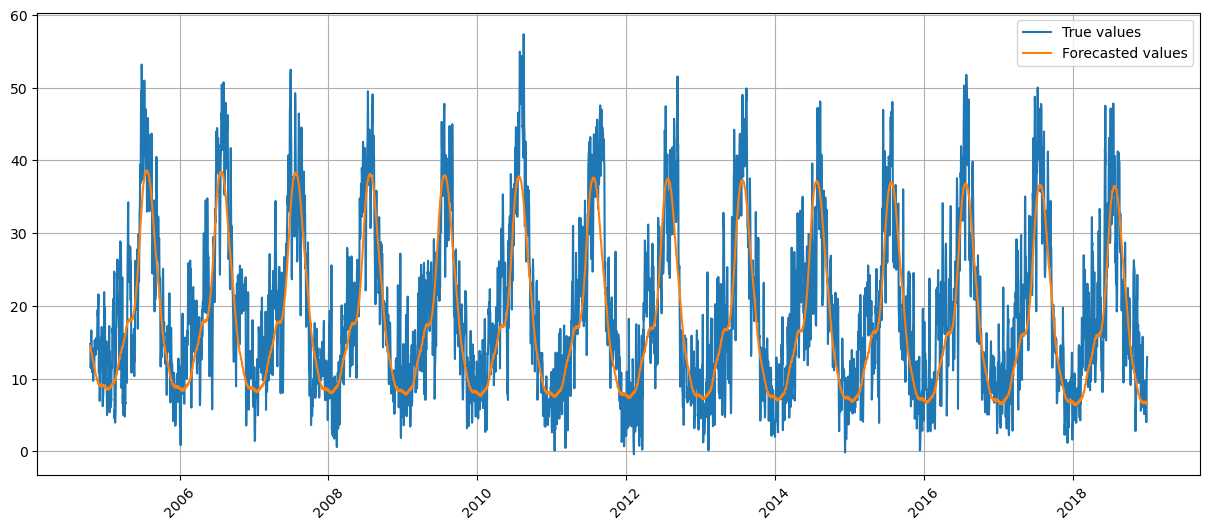

In [56]:
plt.figure(figsize=(15,6))
plt.plot(y_true, label='True values')
plt.plot(yhat, label='Forecasted values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

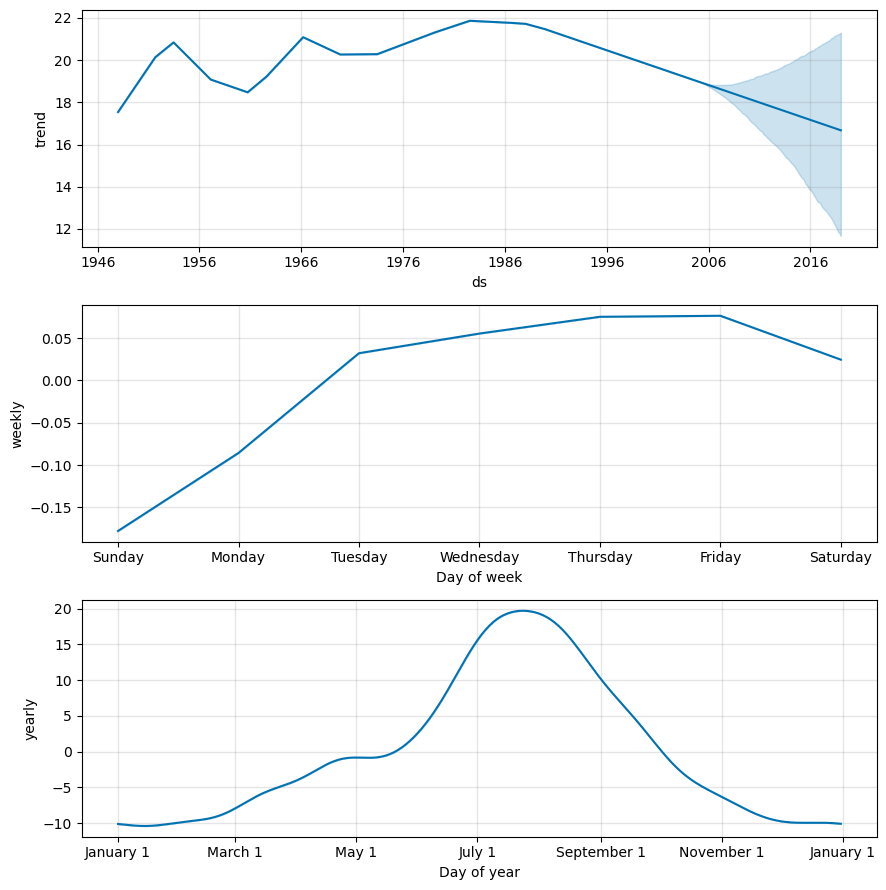

In [57]:
model.plot_components(forecast)
plt.show()